<a href="https://colab.research.google.com/github/oshanmay11/my_projects/blob/main/use_case_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Regression

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression/Data.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Training the Polynomial Regression model on the Training set

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_red = PolynomialFeatures(degree = 4)
x_poly = poly_red.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(x_poly,y_train)

LinearRegression()

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(poly_red.transform(x_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[434.16 431.23]
 [458.26 460.01]
 [460.72 461.14]
 ...
 [469.49 473.26]
 [438.53 438.  ]
 [461.62 463.28]]


## Evaluating the Model Performance

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9455261542316076

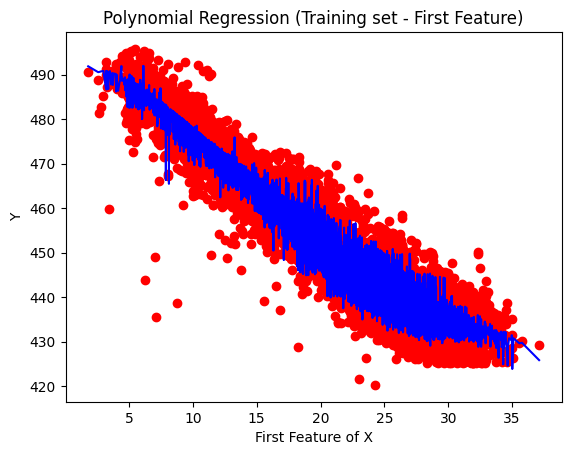

In [12]:
x_plot = x_train[:, 0] # Select the first feature for plotting
y_pred_train = regressor.predict(poly_red.transform(x_train)) # Use transform, not fit_transform

# Sort the values to get a smooth regression line
sort_idx = np.argsort(x_plot)
x_plot_sorted = x_plot[sort_idx]
y_pred_train_sorted = y_pred_train[sort_idx]

plt.scatter(x_plot, y_train, color = 'red')
plt.plot(x_plot_sorted, y_pred_train_sorted, color = 'blue')
plt.title('Polynomial Regression (Training set - First Feature)')
plt.xlabel('First Feature of X')
plt.ylabel('Y')
plt.show()

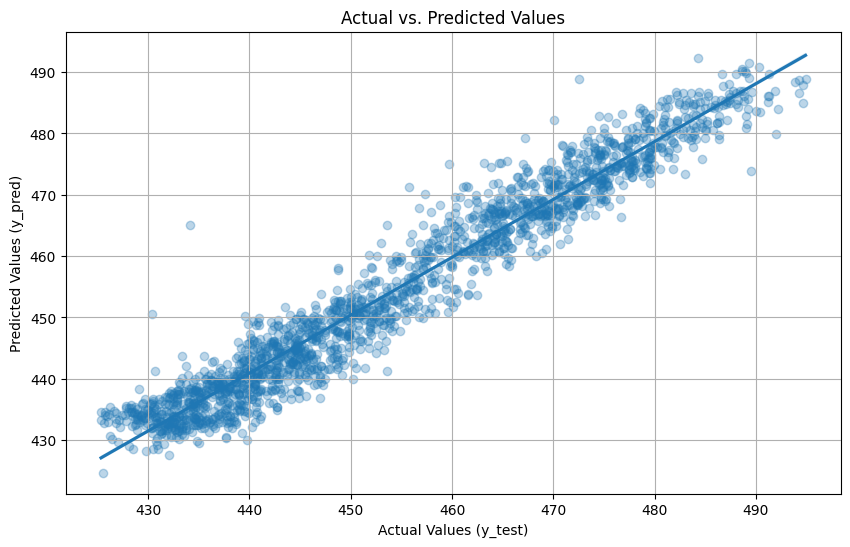

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()